Matplotlib disponible
Probando endpoint de imagen...
Endpoint funciona correctamente (26537 bytes)
Endpoint de imagen disponible

--- Test: ¿Qué sentimiento tiene este producto me gusta. ---
Respuesta: {'response': 'Este texto muestra un sentimiento neutral hacia el producto, con un nivel de confianza del 83%. A pesar de que se menciona "me gusta", la forma en que está expresado no transmite un entusiasmo especialmente positivo ni tampoco una crítica negativa. Parece más bien una afirmación casual o moderada sobre el producto.'}

--- Test: ¿Cuáles son las métricas del modelo empleado? ---
Respuesta: {'response': 'Las métricas principales del modelo muestran los siguientes resultados:\n\n- Precisión: 72.4% (qué tan exactas son las predicciones positivas)\n- Recall (Sensibilidad): 72.4% (qué proporción de casos positivos reales fueron identificados correctamente)\n- F1-Score: 72.4% (media armónica entre precisión y recall)\n\nEn general, el modelo muestra un rendimiento consistente alred

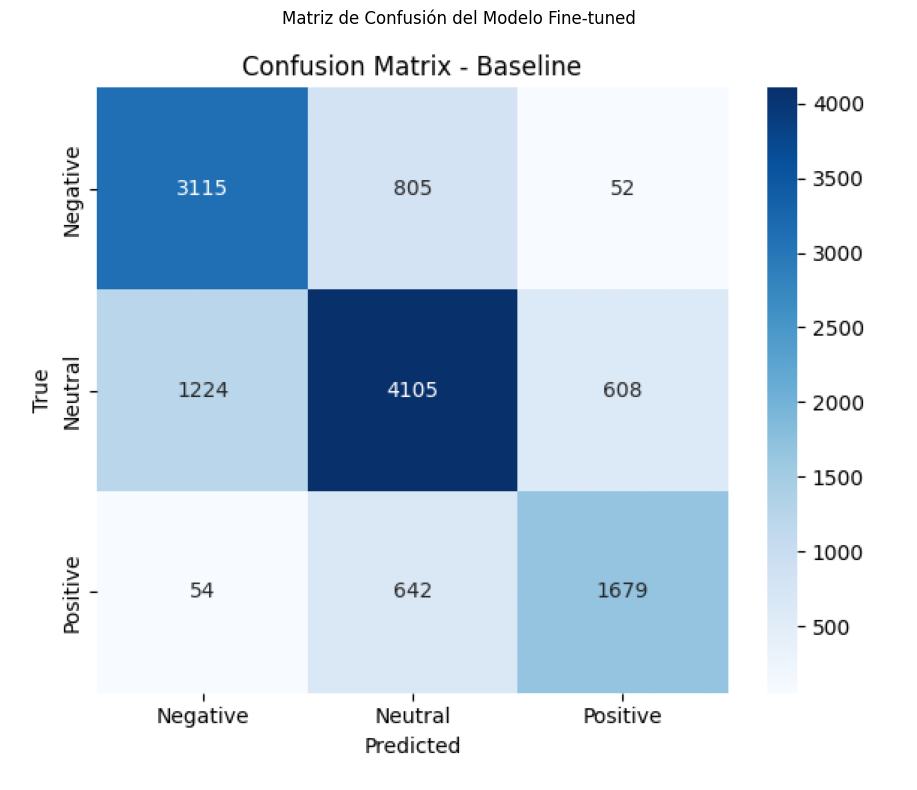


--- Test: Hola, ¿cómo estás? ---
Respuesta: {'response': 'Lo siento, no entiendo esa pregunta; ¿puedes reformularla?'}

URL directa: http://127.0.0.1:8000/confusion-matrix


In [1]:
import requests
import json
import os

URL = "http://127.0.0.1:8000/ask"
IMAGE_URL = "http://127.0.0.1:8000/confusion-matrix"

def show_image_with_matplotlib(image_path):
    """
    Muestra la imagen usando matplotlib
    """
    try:
        import matplotlib.pyplot as plt
        import matplotlib.image as mpimg
        
        print("Mostrando imagen con matplotlib...")
        
        img = mpimg.imread(image_path)
        plt.figure(figsize=(10, 8))
        plt.imshow(img)
        plt.title("Matriz de Confusión del Modelo Fine-tuned")
        plt.axis('off')
        plt.tight_layout()
        plt.show()
        return True
        
    except ImportError:
        print("Matplotlib no está instalado. Instalarlo con: pip install matplotlib")
        return False
    except Exception as e:
        print(f"Error con matplotlib: {e}")
        return False

def test_query(prompt):
    response = requests.post(URL, json={"question": prompt})
    print(f"\n--- Test: {prompt} ---")
    
    if response.status_code == 200:
        result = response.json()
        print("Respuesta:", result)
        
        # Si la pregunta es sobre matriz de confusión, mostrar la imagen
        if "confusión" in prompt.lower() or "confusion" in prompt.lower():
            print("\nDescargando y mostrando matriz de confusión...")
            
            try:
                img_response = requests.get(IMAGE_URL)
                if img_response.status_code == 200:
                    temp_path = "temp_confusion_matrix.png"
                    with open(temp_path, "wb") as f:
                        f.write(img_response.content)
                    print(f"Imagen descargada ({len(img_response.content)} bytes)")
                    
                    # Mostrar con matplotlib
                    show_image_with_matplotlib(temp_path)
                    
                    # Limpiar archivo temporal
                    try:
                        os.remove(temp_path)
                    except:
                        pass
                        
                else:
                    print(f"Error al descargar imagen: {img_response.status_code}")
                    
            except Exception as e:
                print(f"Error al procesar imagen: {e}")
    else:
        print(f"Error {response.status_code}:")
        print(response.text)

def test_image_endpoint():
    print("Probando endpoint de imagen...")
    try:
        response = requests.get(IMAGE_URL)
        if response.status_code == 200:
            print(f"Endpoint funciona correctamente ({len(response.content)} bytes)")
            return True
        else:
            print(f"Endpoint falló: {response.status_code}")
            return False
    except Exception as e:
        print(f"Error: {e}")
        return False

if __name__ == "__main__":
    # Verificar matplotlib
    try:
        import matplotlib.pyplot as plt
        print("Matplotlib disponible")
    except ImportError:
        print("ERROR: Matplotlib no está instalado")
        print("Instalar con: pip install matplotlib")
        exit(1)
    
    print("="*60)
    
    if test_image_endpoint():
        print("Endpoint de imagen disponible")
    
    questions = [
        "¿Qué sentimiento tiene este producto me gusta.",
        "¿Cuáles son las métricas del modelo empleado?", 
        "Muéstrame la matriz de confusión del modelo fine-tuned.",
        "Hola, ¿cómo estás?"
    ]

    for q in questions:
        test_query(q)
    
    print(f"\nURL directa: {IMAGE_URL}")